In [5]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

file_path="C:/Users/Tenzin Choeyang D/OneDrive/Desktop/vgchartz-2024.csv"
df=pd.read_csv(file_path)

df.head()

# Data Cleaning
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')
df['critic_score'].fillna(df['critic_score'].mean(), inplace=True)

C:\Users\Tenzin Choeyang D\AppData\Local\Temp\ipykernel_18064\2439640785.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['critic_score'].fillna(df['critic_score'].mean(), inplace=True)


In [13]:
print(df)

                                                 img  \
0      /games/boxart/full_6510540AmericaFrontccc.jpg   
1      /games/boxart/full_5563178AmericaFrontccc.jpg   
2                        /games/boxart/827563ccc.jpg   
3      /games/boxart/full_9218923AmericaFrontccc.jpg   
4      /games/boxart/full_4990510AmericaFrontccc.jpg   
...                                              ...   
64011                                            NaN   
64012                                            NaN   
64013                                            NaN   
64014                                            NaN   
64015                                            NaN   

                             title console    genre       publisher  \
0               Grand Theft Auto V     PS3   Action  Rockstar Games   
1               Grand Theft Auto V     PS4   Action  Rockstar Games   
2      Grand Theft Auto: Vice City     PS2   Action  Rockstar Games   
3               Grand Theft Auto V    X360 

In [21]:
df.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,release_year
count,64016.000000,17570.000000,12455.000000,6475.000000,11782.000000,14141.000000,17508,17508.000000
mean,7.105053,0.375977,0.268609,0.106246,0.162691,0.046045,2008-03-28 06:57:19.616175360,2007.669865
min,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,1977-01-01 00:00:00,1977.000000
25%,7.105053,0.050000,0.050000,0.020000,0.020000,0.000000,2004-09-07 00:00:00,2004.000000
50%,7.105053,0.140000,0.120000,0.050000,0.050000,0.010000,2008-10-21 00:00:00,2008.000000
75%,7.105053,0.380000,0.280000,0.120000,0.150000,0.040000,2011-11-18 00:00:00,2011.000000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000,2020-12-31 00:00:00,2020.000000
std,0.357098,0.831906,0.497345,0.170824,0.407016,0.130460,NaN,6.129213


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   img           17570 non-null  object        
 1   title         17570 non-null  object        
 2   console       17570 non-null  object        
 3   genre         17570 non-null  object        
 4   publisher     17570 non-null  object        
 5   developer     17568 non-null  object        
 6   critic_score  64016 non-null  float64       
 7   total_sales   17570 non-null  float64       
 8   na_sales      12455 non-null  float64       
 9   jp_sales      6475 non-null   float64       
 10  pal_sales     11782 non-null  float64       
 11  other_sales   14141 non-null  float64       
 12  release_date  17508 non-null  datetime64[ns]
 13  last_update   3801 non-null   object        
 14  release_year  17508 non-null  float64       
dtypes: datetime64[ns](1), float64(7), ob

In [37]:
print(df.isnull())

         img  title  console  genre  publisher  developer  critic_score  \
0      False  False    False  False      False      False         False   
1      False  False    False  False      False      False         False   
2      False  False    False  False      False      False         False   
3      False  False    False  False      False      False         False   
4      False  False    False  False      False      False         False   
...      ...    ...      ...    ...        ...        ...           ...   
64011   True   True     True   True       True       True         False   
64012   True   True     True   True       True       True         False   
64013   True   True     True   True       True       True         False   
64014   True   True     True   True       True       True         False   
64015   True   True     True   True       True       True         False   

       total_sales  na_sales  jp_sales  pal_sales  other_sales  release_date  \
0            False 

In [45]:
df.isnull().sum()

img             46446
title           46446
console         46446
genre           46446
publisher       46446
developer       46448
critic_score        0
total_sales     46446
na_sales        51561
jp_sales        57541
pal_sales       52234
other_sales     49875
release_date    46508
last_update     60215
release_year    46508
dtype: int64

In [53]:
print(df.shape)

(64016, 15)


In [61]:
df.dropna(inplace=True)
print(df)

                                                 img  \
1      /games/boxart/full_5563178AmericaFrontccc.jpg   
4      /games/boxart/full_4990510AmericaFrontccc.jpg   
7      /games/boxart/full_4653215AmericaFrontccc.jpg   
8      /games/boxart/full_1977964AmericaFrontccc.jpg   
9      /games/boxart/full_4649679AmericaFrontccc.png   
...                                              ...   
13130  /games/boxart/full_9635491AmericaFrontccc.jpg   
13169   /games/boxart/full_362126AmericaFrontccc.jpg   
13198  /games/boxart/full_5198003AmericaFrontccc.jpg   
13642  /games/boxart/full_6090603AmericaFrontccc.jpg   
15044      /games/boxart/full_8777680PALFrontccc.png   

                               title console             genre  \
1                 Grand Theft Auto V     PS4            Action   
4          Call of Duty: Black Ops 3     PS4           Shooter   
7              Red Dead Redemption 2     PS4  Action-Adventure   
8         Call of Duty: Black Ops II    X360           Shooter 

In [69]:
print(df.columns)

Index(['img', 'title', 'console', 'genre', 'publisher', 'developer',
       'critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales',
       'other_sales', 'release_date', 'last_update', 'release_year'],
      dtype='object')


C:\Users\Tenzin Choeyang D\AppData\Local\Temp\ipykernel_18064\485854960.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_games, y='title', x='total_sales', palette='viridis')


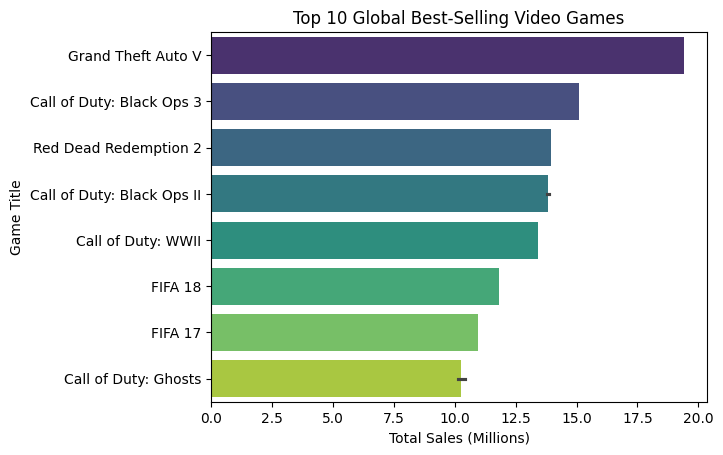

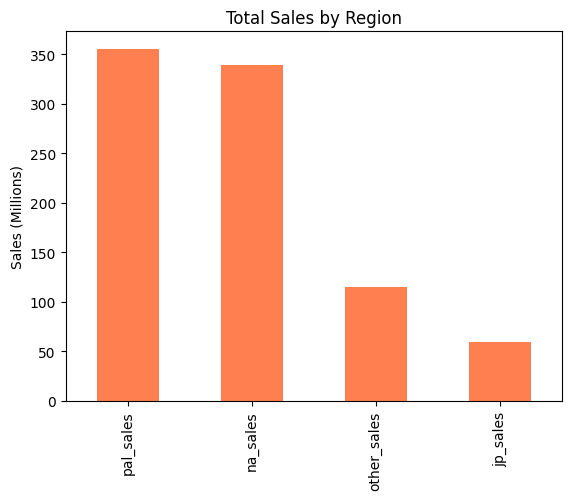

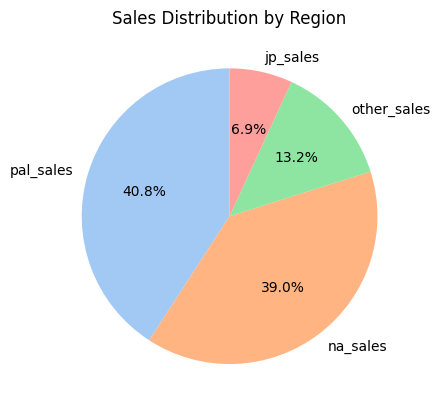

In [77]:
# 1. Global and Regional Sales
top_games = df.sort_values(by='total_sales', ascending=False).head(10)
sns.barplot(data=top_games, y='title', x='total_sales', palette='viridis')
plt.title("Top 10 Global Best-Selling Video Games")
plt.xlabel("Total Sales (Millions)")
plt.ylabel("Game Title")
plt.show()

# Regional sales breakdown
regions = ['na_sales', 'jp_sales', 'pal_sales', 'other_sales']
regional_sales = df[regions].sum().sort_values(ascending=False)
regional_sales.plot(kind='bar', color='coral')
plt.title("Total Sales by Region")
plt.ylabel("Sales (Millions)")
plt.show()

# Pie chart
regional_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Sales Distribution by Region")
plt.ylabel("")
plt.show()

C:\Users\Tenzin Choeyang D\AppData\Local\Temp\ipykernel_18064\4277674114.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_sales.values, y=platform_sales.index, palette='cubehelix')


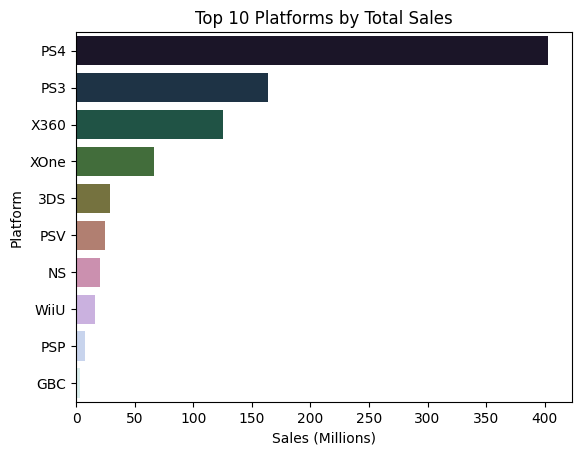

C:\Users\Tenzin Choeyang D\AppData\Local\Temp\ipykernel_18064\4277674114.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales.values, y=avg_sales.index, palette='magma')


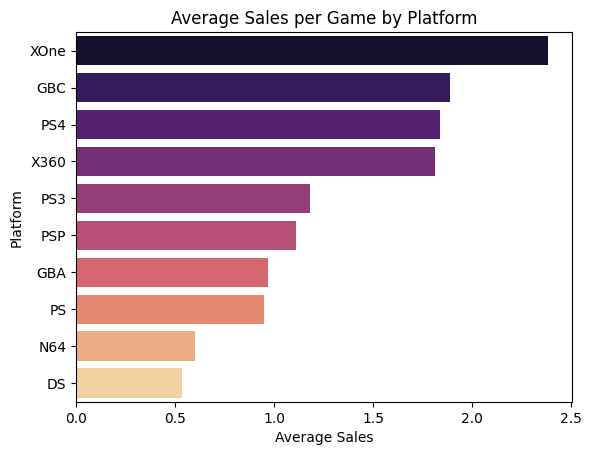

C:\Users\Tenzin Choeyang D\AppData\Local\Temp\ipykernel_18064\4277674114.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_games.values, y=count_games.index, palette='Blues_d')


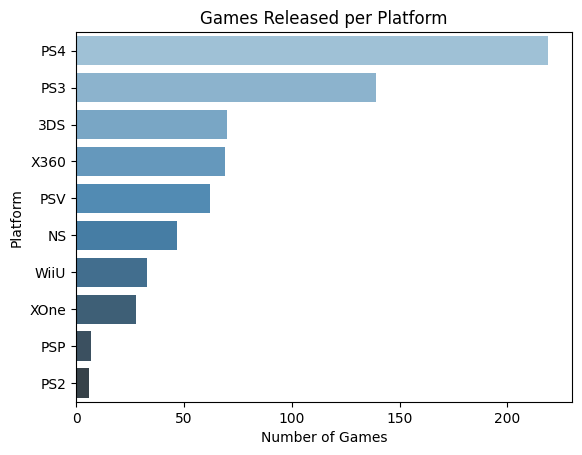

In [84]:
# 2. Platform Performance
platform_sales = df.groupby('console')['total_sales'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=platform_sales.values, y=platform_sales.index, palette='cubehelix')
plt.title("Top 10 Platforms by Total Sales")
plt.xlabel("Sales (Millions)")
plt.ylabel("Platform")
plt.show()

# Average sales per game by platform
avg_sales = df.groupby('console')['total_sales'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_sales.values, y=avg_sales.index, palette='magma')
plt.title("Average Sales per Game by Platform")
plt.xlabel("Average Sales")
plt.ylabel("Platform")
plt.show()

# Number of games released
count_games = df['console'].value_counts().head(10)
sns.barplot(x=count_games.values, y=count_games.index, palette='Blues_d')
plt.title("Games Released per Platform")
plt.xlabel("Number of Games")
plt.ylabel("Platform")
plt.show()

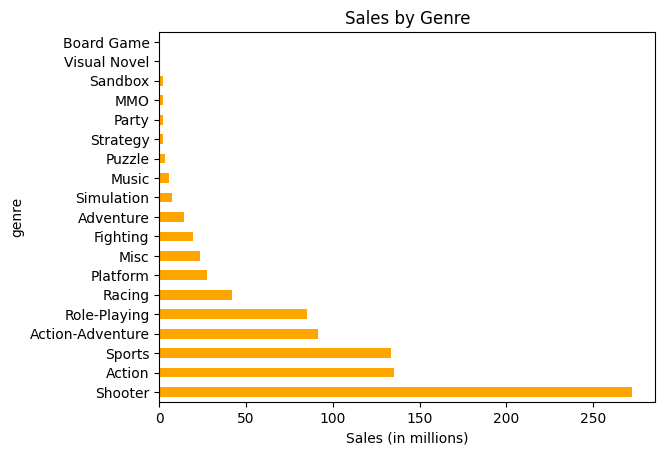

In [85]:
# 3. Genre and Developer Insights
genre_sales = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
top_devs = df.groupby('developer')['total_sales'].sum().sort_values(ascending=False).head(10)

# Plot genre sales
genre_sales.plot(kind='barh', title='Sales by Genre', color='orange')
plt.xlabel("Sales (in millions)")
plt.show()

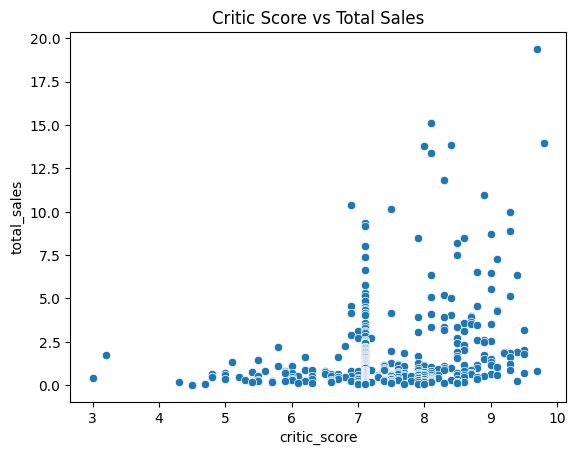

Correlation between Critic Score and Sales: 0.34


In [86]:
# 4. Critic Score Correlation
sns.scatterplot(x='critic_score', y='total_sales', data=df)
plt.title('Critic Score vs Total Sales')
plt.show()

correlation = df[['critic_score', 'total_sales']].corr().iloc[0, 1]
print(f"Correlation between Critic Score and Sales: {correlation:.2f}")


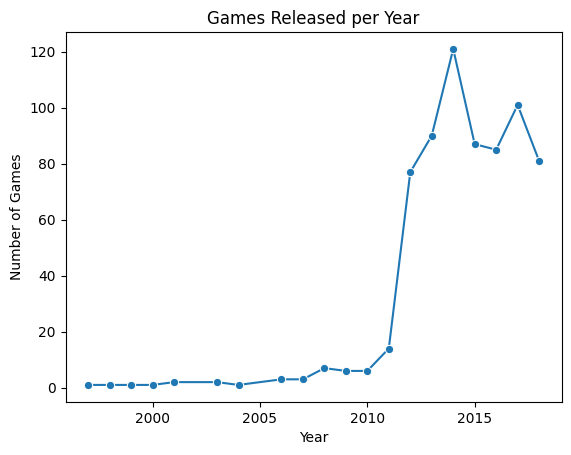

In [95]:
# 5. # Year-wise releases
df['Year'] = df['release_date'].dt.year
games_per_year = df['Year'].value_counts().sort_index()
sns.lineplot(x=games_per_year.index, y=games_per_year.values, marker='o')
plt.title("Games Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Games")
plt.show()


In [96]:
# 6. Top 10 Titles by Sales
top_titles = df[['title', 'total_sales']].drop_duplicates().sort_values(by='total_sales', ascending=False).head(10)
print("Top 10 Games by Global Sales:")
print(top_titles)


Top 10 Games by Global Sales:
                         title  total_sales
1           Grand Theft Auto V        19.39
4    Call of Duty: Black Ops 3        15.09
7        Red Dead Redemption 2        13.94
8   Call of Duty: Black Ops II        13.86
9   Call of Duty: Black Ops II        13.80
11          Call of Duty: WWII        13.40
15                     FIFA 18        11.80
17                     FIFA 17        10.94
20        Call of Duty: Ghosts        10.41
21        Call of Duty: Ghosts        10.13


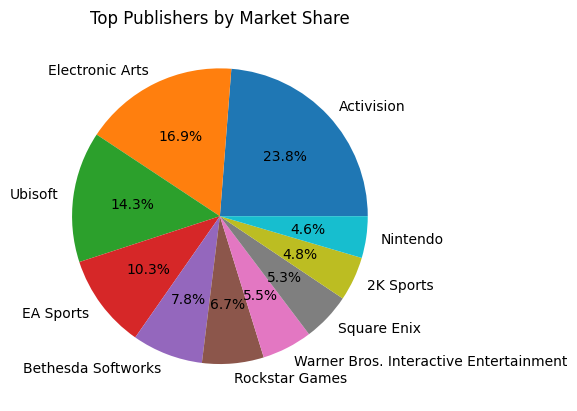

In [97]:
# 7. Publisher Market Share
top_publishers = df.groupby('publisher')['total_sales'].sum().sort_values(ascending=False).head(10)

top_publishers.plot(kind='pie', autopct='%1.1f%%', title='Top Publishers by Market Share')
plt.ylabel("")
plt.show()

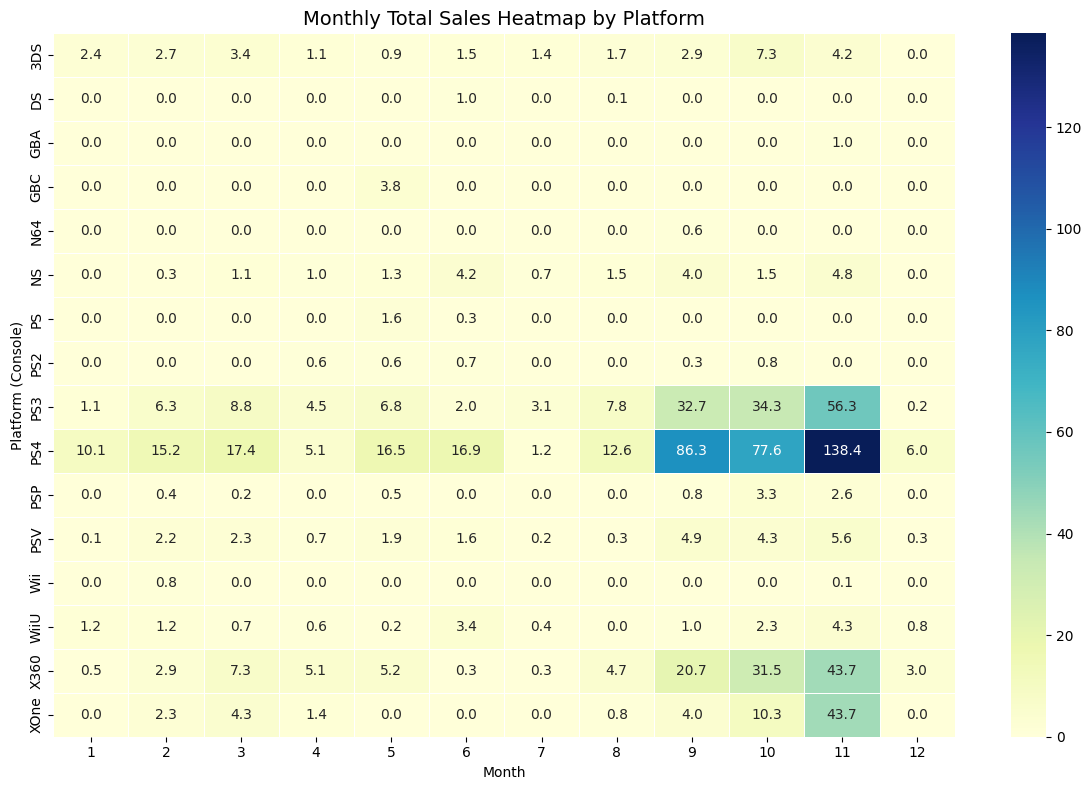

In [ ]:
# 8. Monthly Total Sales 
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

df = df.dropna(subset=['release_date'])

df['Release_Month'] = df['release_date'].dt.month
df['Release_Month'] = df['Release_Month'].fillna(0).astype(int)

# Pivot table: Total sales per platform per month
pivot_data = df.pivot_table(index='console', columns='Release_Month', values='total_sales', aggfunc='sum').fillna(0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap="YlGnBu", linewidths=0.5, linecolor='white', annot=True, fmt=".1f")
plt.title("Monthly Total Sales Heatmap by Platform", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Platform (Console)")
plt.tight_layout()
plt.show()